# Visualization and proof of the π-jump principle

πジャンプ原理の可視化と証明式

cid: 68035567-f8e8-8009-9eb6-ffe0f3806c29

| # | Framework | Key Tools | How the “±π Jump” Appears | Strengths | Caveats |
|---|-----------|-----------|----------------------------|-----------|---------|
| **1** | **Argument Principle + Jensen’s Formula** | $\displaystyle N_\gamma=\frac1{2\pi}\Delta_\gamma\arg\zeta$<br>(Phase difference along a vertical path γ) | When continuously extending $\arg \zeta$ along vertical lines σ = const.,<br>**each zero crossing results in a ±π jump** (due to sign flip of Re/Im).<br>The phase displacement directly counts zeros: π jumps become measurable quantities. | One-to-one correspondence between zero count and phase difference → fully analytic. | Requires precise management of branch cuts and pole contributions (s = 1, ∞). |
| **2** | **Hardy’s Z-Function Analysis** | $Z(t) = e^{i\vartheta(t)}\zeta\!\left(\tfrac12+it\right) \in \mathbb{R}$ | Since Z(t) is real-valued, **sign changes = nontrivial zeros**.<br>If arctan(Im/Re) is interpreted through Z’s sign flips:<br> “+ to −” causes a +π jump, “− to +” causes a −π jump. | Reduced to real-variable analysis → allows use of high-precision numerics and Rolle’s theorem. | Valid only on σ = ½. To treat horizontal shifts, a new function $Z_\sigma(t)$ must be introduced. |


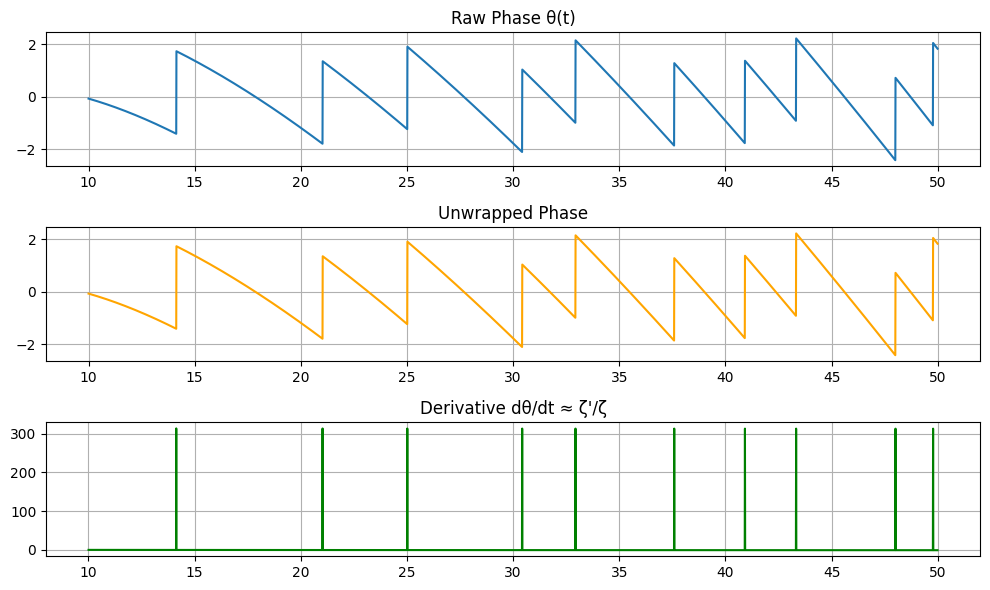

In [1]:
# Argument Principle + Jensen’s Formula and Hardy’s Z-Function Analysis
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp, zeta

# Precision setting
mp.dps = 50

# Analysis line: σ + it (fixed σ)
sigma = 0.5  # Re(s)
t_min = 10
t_max = 50
dt = 0.01
t_vals = np.arange(t_min, t_max, dt)

# Argument of ζ(s): θ(t) = arg(ζ(σ + it))
theta_vec = []
for t in t_vals:
    s = mp.mpc(sigma, t)
    z = zeta(s)
    theta = mp.arg(z)
    theta_vec.append(float(theta))

# Unwrap the phase (make ±π jumps continuous)
theta_unwrapped = np.unwrap(theta_vec)

# Derivative (numerical approximation): dθ/dt
dtheta_dt = np.diff(theta_unwrapped) / dt

# Integration (phase change as zero count): ∫ dθ/dt dt
theta_drift = np.cumsum(dtheta_dt) * dt

# Plotting (multiple options)
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t_vals, theta_vec, label="arg ζ(s)")
plt.title("Raw Phase θ(t)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t_vals, theta_unwrapped, label="Unwrapped arg ζ(s)", color='orange')
plt.title("Unwrapped Phase")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t_vals[1:], dtheta_dt, label="dθ/dt", color='green')
plt.title("Derivative dθ/dt ≈ ζ'/ζ")
plt.grid()

plt.tight_layout()
# save figures
plt.savefig("o3-Type1+2-zeta_phase_analysis-v1.png", dpi=300)
plt.show()


In [3]:
# π jump detection: Detect sudden changes exceeding the threshold
threshold = np.pi * 0.9  # Detect jumps of 0.9π or more
jump_indices = np.where(np.abs(dtheta_dt) > threshold)[0]
zero_t_vals = t_vals[1:][jump_indices]

print("Detected zeros (t values):")
print(zero_t_vals)
print(f"Number of zeros: {len(zero_t_vals)}")


Detected zeros (t values):
[14.14 21.03 25.02 30.43 32.94 37.59 40.92 43.33 48.01 49.78]
Number of zeros: 10
